In [10]:
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
import import_ipynb
import player as p

importing Jupyter notebook from player.ipynb


In [4]:
import import_ipynb
import wall as w

importing Jupyter notebook from wall.ipynb


In [5]:
def checkWinner():
    finish_line = [16,0,16,0]
    for pl in p.players:
        i = pl.id - 1
        if (pl.id <= 2):
            if(pl.x == finish_line[i]):
                print("GAME OVER")
                print("Player", pl.id, "wins")
        else:
            if(pl.y == finish_line[i]):
                print("GAME OVER")
                print("Player", pl.id, "wins")

In [6]:
#Note, character goes by 2 spaces, because one space is for the walls
def drawQuoridorBoard(nop):
    bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
    #total of 17x17 board
    bo += 0.8 #opactiy of black spaces
    bo[ ::2, ::2] = 1
    bo[0::2, 0::2] = 1

    fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
    ax.imshow(bo, interpolation='nearest')

    #add players:
    p.addPlayers(nop)
    p.drawPlayers(ax)

    #add walls:
    w.addWalls(nop)
    w.drawWalls(ax)

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

In [7]:
def game():
    bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
    #total of 17x17 board
    bo += 0.8 #opactiy of black spaces
    bo[ ::2, ::2] = 1
    bo[0::2, 0::2] = 1

    fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
    ax.imshow(bo, interpolation='nearest')

    #since the game already started, you just draw the players
    p.drawPlayers(ax)

    #just draw the walls
    w.drawWalls(ax)

    #checks if a player reached the opposite side
    checkWinner()

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

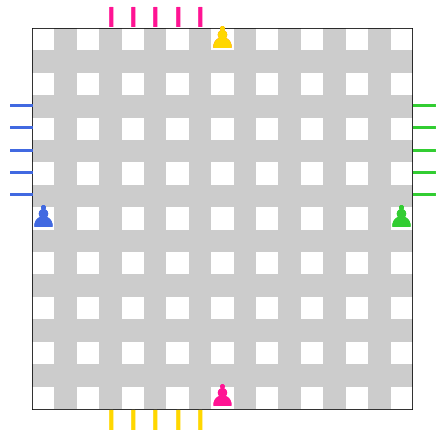

Can't place a wall


In [11]:
#note: Quoridor can only be played by either 2 or 4 players
#It is imposible to play with 3 players due to the amount of walls
#20 is the amount of walls that should be divided into the number of players
#Ergo, it can only be played by a divisble by 10 number of players (2 or 4)

nop = 4 #number of players

drawQuoridorBoard(nop)
p.players[2].place_wall(1, 3)
